In [2]:
import os 
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

from sklearn.preprocessing import LabelEncoder
from torchvision import datasets

In [3]:
DATA_PATH = '../dataset/set_dataset/'
train_path = os.path.join(DATA_PATH, 'train/')
valid_path = os.path.join(DATA_PATH, 'val/') 
test_path = os.path.join(DATA_PATH, 'test/')
train_labels = '../dataset/set_dataset/train_labes.csv'
test_labels = '../dataset/set_dataset/test_labes.csv'
valid_labels = '../dataset/set_dataset/val_labes.csv'

In [4]:
train_labels = pd.read_csv(train_labels)
train_labels.head()

,filename,class,class_num
0,bolt_0.jpg,bolt,1
1,bolt_1.jpg,bolt,1
2,bolt_10.jpg,bolt,1
3,bolt_102.jpg,bolt,1
4,bolt_103.jpg,bolt,1


In [5]:
lb = LabelEncoder()
train_labels['encoded_labels'] = lb.fit_transform(train_labels['class'])
train_labels.tail()

,filename,class,class_num,encoded_labels
1514,pipe_444.jpg,pipe,5,4
1515,pipe_445.jpg,pipe,5,4
1516,pipe_446.jpg,pipe,5,4
1517,pipe_447.jpg,pipe,5,4
1518,pipe_448.jpg,pipe,5,4


In [6]:
train_labels['class'].value_counts()

pipe          479
nut           309
bolt          248
lead-block    243
flange        240
Name: class, dtype: int64

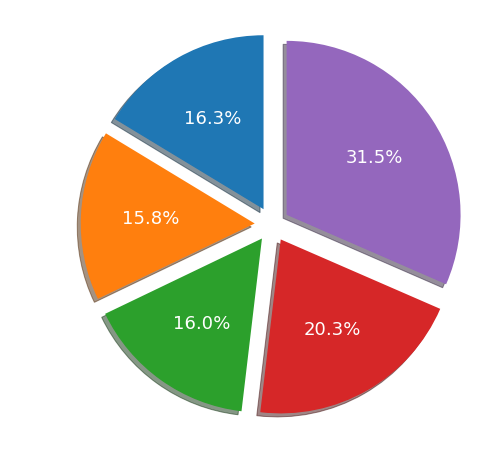

In [7]:
label = ['bolt', 'flange', 'lead-block', 'nut', 'pipe']
plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 18
myexplode = [0.1, 0.1, 0.1, 0.1, 0.1]
plt.pie(train_labels.groupby('class').size(), labels=label,
        autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={'color':"w"},
       explode=myexplode)
plt.show()

In [8]:
class_names_label = {label: i for i, label in enumerate(label)}
print(class_names_label)
num_classes = len(label)
print(f"There are total {num_classes} classes")

{'bolt': 0, 'flange': 1, 'lead-block': 2, 'nut': 3, 'pipe': 4}
There are total 5 classes


In [9]:
# Find the mean and std of the training dataset

train_path = '../dataset/filed_dataset/train/'
train_data = datasets.ImageFolder(train_path, transform=transforms.ToTensor())

means = torch.zeros(3)
stds = torch.zeros(3)

for img, label in train_data:
    means += torch.mean(img, dim=(1,2))
    stds += torch.std(img, dim=(1,2))

means /= len(train_data)
stds /= len(train_data)
print(f'Calculated means: {means}')
print(f'Calculated stds: {stds}')

Calculated means: tensor([0.3110, 0.2893, 0.2787])
Calculated stds: tensor([0.1332, 0.1328, 0.1320])


In [11]:
raw_data_csv = '../dataset/raw_labes.csv'

data = pd.read_csv(raw_data_csv)
data.head()

,filename,class,class_num
0,bolt_260.jpg,bolt,1
1,bolt_261.jpg,bolt,1
2,bolt_262.jpg,bolt,1
3,bolt_263.jpg,bolt,1
4,bolt_264.jpg,bolt,1
